#### Jérémy TREMBLAY

# TD1: Decision Tree Classification

In [34]:
# Import the library that will be used in this notebook.
import pandas as pd

# Import the pyplot module from matplotlib with the plt alias.
import matplotlib.pyplot as plt

# Import the sklearn modules.
from sklearn.datasets import load_iris
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier

## Task 2: Create decision tree

Il est possible avec la librairie `scikit-learn` de créer des modèles d’arbres de décision à partir de données. En voici un exemple « naïf » sur la base de données iris :

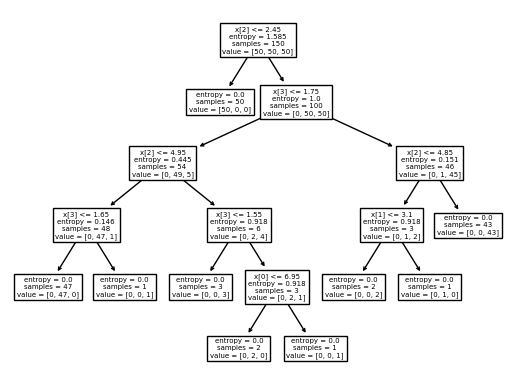

In [35]:
# Small sample.
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
tree.plot_tree(clf)
plt.savefig('tree.pdf', format='pdf', bbox_inches = "tight")

**Consigne :** À partir de la base de données de *titanic*, proposer un modèle d’arbre de décision performant qui prédit si une personne survit ou non.

### First step: prepare data

First we need to load and prepare data.

In [36]:
# Specify the relative path of the titanic file.
file_path = 'datasets/titanic.csv'

# Load the database into a DataFrame.
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame with head.
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [37]:
print(df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Embarked        True
dtype: bool


The dataset has empty columns, let's fix this.

In [38]:
# Tyhe dataset contains 891 rows.
print(len(df.index))

# Delete the rows with missing values.
df.dropna(inplace=True)

# Now the dataset only contains 712 rows (the other were removed).
print(len(df.index))

891
712


Let's check everything is ok.

In [39]:
print(df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool


In [40]:
# Know the dimensions of the dataframe.
df.shape

(712, 9)

There is 712 rows and 9 columns, let's check the content more in detail with some stats.

In [41]:
# Display usefull information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


In [42]:
# Let's encode the ordinal variables (sex and embarked).
encoder = OrdinalEncoder()
df[['Sex', 'Embarked']] = encoder.fit_transform(df[['Sex', 'Embarked']])

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,1.595506
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.779038
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,2.000000
50%,445.000000,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,2.000000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [44]:
df.Survived.value_counts()

0    424
1    288
Name: Survived, dtype: int64

What we can conclude about this data:  

* Only 288 passengers survived (424 were death).

* We want to found the causes of the deaths (or why some people was saved). For that, we will analyze the columns concerning the age of the people, the sex, the class, the sibsp, the parchh, the fare and the embarked value of each person.

* The `PassengerId` is useless, let's drop it.

### Second step: Split data

Now let's split the data between train and test.

In [45]:
# Load our fields X and Y. 
X = df[df.columns.difference(["Survived", "PassengerId"])]
print(X)
Y = df["Survived"].values
print(Y)

      Age  Embarked     Fare  Parch  Pclass  Sex  SibSp
0    22.0       2.0   7.2500      0       3  1.0      1
1    38.0       0.0  71.2833      0       1  0.0      1
2    26.0       2.0   7.9250      0       3  0.0      0
3    35.0       2.0  53.1000      0       1  0.0      1
4    35.0       2.0   8.0500      0       3  1.0      0
..    ...       ...      ...    ...     ...  ...    ...
885  39.0       1.0  29.1250      5       3  0.0      0
886  27.0       2.0  13.0000      0       2  1.0      0
887  19.0       2.0  30.0000      0       1  0.0      0
889  26.0       0.0  30.0000      0       1  1.0      0
890  32.0       1.0   7.7500      0       3  1.0      0

[712 rows x 7 columns]
[0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0

In [46]:
# Split data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42) # 1/3 for the test.
print("Train: ", len(X_train), ", ", len(y_train))
print("Test: ", len(X_test), ", ", len(y_test))

Train:  477 ,  477
Test:  235 ,  235


### Third part: Create decision tree

In [47]:
# Train decision tree with various depth.
depths = range(1, 21)
accuracy_scores = []
precision_scores = []

# Iterate for each depth and compute accuracy and precision.
for depth in depths:
    model = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("For max_depth =", depth, "we have these accuracy (scaled data), for train:", train_score, "for test:", test_score)

For max_depth = 1 we have these accuracy (scaled data), for train: 0.790356394129979 for test: 0.7574468085106383
For max_depth = 2 we have these accuracy (scaled data), for train: 0.7987421383647799 for test: 0.774468085106383
For max_depth = 3 we have these accuracy (scaled data), for train: 0.8322851153039832 for test: 0.7148936170212766
For max_depth = 4 we have these accuracy (scaled data), for train: 0.8658280922431866 for test: 0.7361702127659574
For max_depth = 5 we have these accuracy (scaled data), for train: 0.8867924528301887 for test: 0.7404255319148936
For max_depth = 6 we have these accuracy (scaled data), for train: 0.909853249475891 for test: 0.7489361702127659
For max_depth = 7 we have these accuracy (scaled data), for train: 0.9245283018867925 for test: 0.7446808510638298
For max_depth = 8 we have these accuracy (scaled data), for train: 0.9350104821802935 for test: 0.7319148936170212
For max_depth = 9 we have these accuracy (scaled data), for train: 0.95178197064989

The accuracy is not enough, let's display a graph of the computed data:

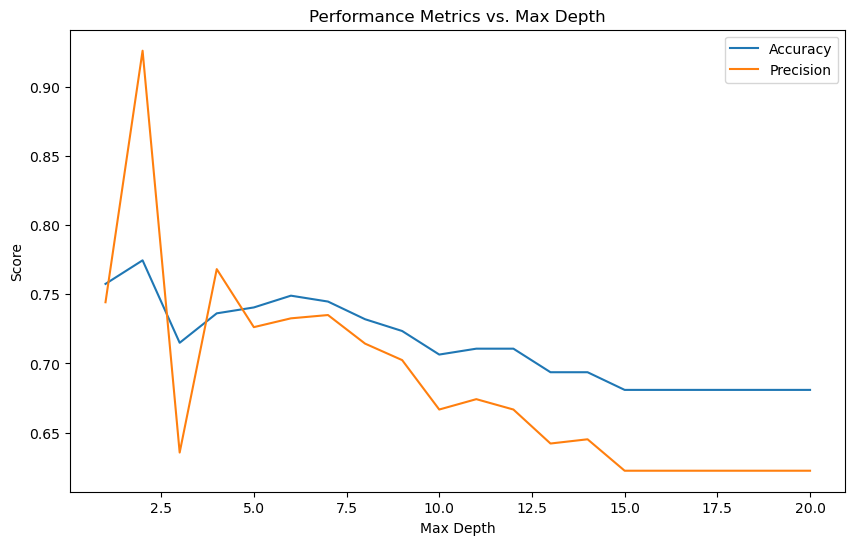

In [48]:
# Display data depending on the tree depth.
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_scores, label='Accuracy')
plt.plot(depths, precision_scores, label='Precision')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.title('Performance Metrics vs. Max Depth')
plt.show()

We can see that the best accuracy and precision are reached when `max_depth` = 2, so let's use `max_depth` = 2 and use our model.
We can see that a bigger depth increases the train accuracy but decreasses the test accuracy. This is because the tree is overfitting the model (with too many branches and depth) and it knows it perfectly at the end, which results in bad performances for the train part.
It is important to not take a big depth.

In [49]:
# We can then choose an optimal depth.
optimal_depth = depths[accuracy_scores.index(max(accuracy_scores))]
print(f'Optimal Max Depth: {optimal_depth}')

Optimal Max Depth: 2


In [50]:
# Train our model with this depth.
final_model = tree.DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model.
y_pred_final = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)

print(f'Model Evaluation - Max Depth {optimal_depth}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')

Model Evaluation - Max Depth 2
Accuracy: 0.774468085106383
Precision: 0.9259259259259259


## Task 4: Use an ensemble model to improve results.

**Consigne :** Généralement un arbre de décision a tendance à surapprendre. Il existe des méthodes dites « ensembliste » qui limitent ce problème. Elle se basent sur un ensemble de modèles, et dans le cadre d’une classification par exemple, procèdent à un vote majoritaire.  
Un modèle assez connu de cette classe est le `RandomForest` qui possède un nombre d’estimateurs (modèles d’arbres de décision).

En jouant avec les paramètres `n_estimators` et `max_depth` du modèle `RandomForest` (modèle ensembliste), essayez d’améliorer les résultats sur la base de données du titanic.

Let's use different values for `RandomForest` to test the two parameters. The best way to test the combination of two parameters is to test all possibilities but this explodes the complexity and time of the program, so we will limit us between 1 and 100 by 5 for the `n_estimator` and between `None` and 20 (0 excluded) by 2 for the `max_depth`. 

For this test we will only use the accuracy score but in reality, this is recommanded to take into account all values (F1 score, recall, precision...) but to simplify the process here we will ony use the accuracy.

Let's see the results.

In [51]:
# Define the range tested for each parameter.
n_estimators = [x for x in range(1, 100, 5)]
max_depth = [x for x in range(1, 20, 3)]
max_depth.append(None)

# Use to store the best accuracy score and parameters.
best_accuracy = 0
best_params = {}

# Loop through our ranges (slow !).
for n in n_estimators:
    for depth in max_depth:
        # each time, we create a classifier, train it, test it and comute accuracy.
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_test_pred)
        # Only save and print when we found the best accuracy (can be multiple times).
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {"n_estimators": n, "max_depth": depth}
            print(f"Best accuracy found now: n_estimators={n}, max_depth={depth}, Accuracy: {accuracy:.2f}")

print(f"Best Parameters: {best_params}")

Best accuracy found now: n_estimators=1, max_depth=1, Accuracy: 0.64
Best accuracy found now: n_estimators=1, max_depth=4, Accuracy: 0.77
Best accuracy found now: n_estimators=6, max_depth=7, Accuracy: 0.78
Best accuracy found now: n_estimators=6, max_depth=13, Accuracy: 0.79
Best accuracy found now: n_estimators=16, max_depth=4, Accuracy: 0.80
Best accuracy found now: n_estimators=21, max_depth=4, Accuracy: 0.81
Best accuracy found now: n_estimators=56, max_depth=4, Accuracy: 0.81
Best Parameters: {'n_estimators': 56, 'max_depth': 4}


In [52]:
optimal_depth = 4
optimal_estimators = 56

We have found the best parameters for our model:
`n_estimators` = 56 and `max_depth` = 4
Now we can train and fit such a model:

In [53]:
# Train our model with this depth.
final_forest = RandomForestClassifier(n_estimators=optimal_estimators, max_depth=optimal_depth, random_state=42)
final_forest.fit(X_train, y_train)

# Evaluate the final model.
y_pred_final = final_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)

print(f'Model Evaluation - Max Depth {optimal_depth}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')

Model Evaluation - Max Depth 4
Accuracy: 0.8127659574468085
Precision: 0.8089887640449438
